# Pharmaceutical Clinical Mice Trials - Matplotlib & Pandas

## General Observations

1) Capomulin and Ramicane both had the lowest overall average tumor volumes across all datapoints, as well as relatively low variance, standard deviation, and SEM - suggesting that the results for those two regimens were more positive and more consistent than the other regimens studied.

2) Looking at the tumor growth in one of the Capomulin mice (Mouse t565), the results indicate that Capomulin does inhibit tumor growth, but only to a certain point (in this case, between time points 10 and 30). After that, the effectiveness of the drug seems to plateau tumor growth starts to increase again, even with the regimen.

3) Looking at the data for the Capomulin mice, there is a positive correleation between the each mouse's weight and the volume of the tumor, meaning the larger the mouse, the larger the tumor.

## Dependancies & Starter Code

In [54]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
import seaborn as sb
sb.set()

mouse_metadata = "Mouse_metadata.csv"
study_results = "Study_results.csv"

mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

mouse_study_dataset = pd.merge(mouse_metadata, study_results, how="left", on = ["Mouse ID", "Mouse ID"])

## Summary Table: Tumor Growth by Volume (mm3)

In [13]:
df = mouse_study_dataset.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]}).round(2)
summary_stats = df.rename(columns={'mean':'Tumor Volume Mean', 'median':'Tumor Volume Median', 'var':'Tumor Volume Variance','std':'Tumor Volume Std Dev', 'sem':'Tumor Volume SEM'})
summary_stats

Tumor Volume (mm3)                                            \
              Tumor Volume Mean Tumor Volume Median Tumor Volume Variance   
Drug Regimen                                                                
Capomulin                 40.68               41.56                 24.95   
Ceftamin                  52.59               51.78                 39.29   
Infubinol                 52.88               51.82                 43.13   
Ketapril                  55.24               53.70                 68.55   
Naftisol                  54.33               52.51                 66.17   
Placebo                   54.03               52.29                 61.17   
Propriva                  52.32               50.85                 42.35   
Ramicane                  40.22               40.67                 23.49   
Stelasyn                  54.23               52.43                 59.45   
Zoniferol                 53.24               51.82                 48.53   

                                                    
             Tumor Volume Std Dev Tumor Volume SEM  
Drug Regimen                                        
Capomulin                    4.99             0.33  
Ceftamin                     6.27             0.47  
Infubinol                    6.57             0.49  
Ketapril                     8.28             0.60  
Naftisol                     8.13             0.60  
Placebo                      7.82             0.58  
Propriva                     6.51             0.51  
Ramicane                     4.85             0.32  
Stelasyn                     7.71             0.57  
Zoniferol                    6.97             0.52

## Number of datapoints per drug regimen

In [15]:
mouse_study_grouped = mouse_study_dataset.groupby(["Drug Regimen"])

# CREATE VARIABLE FOR X-AXIS.......................................................................
drug_regimen = mouse_study_dataset["Drug Regimen"].unique()
datapoints = mouse_study_grouped["Tumor Volume (mm3)"].count()
datapoints

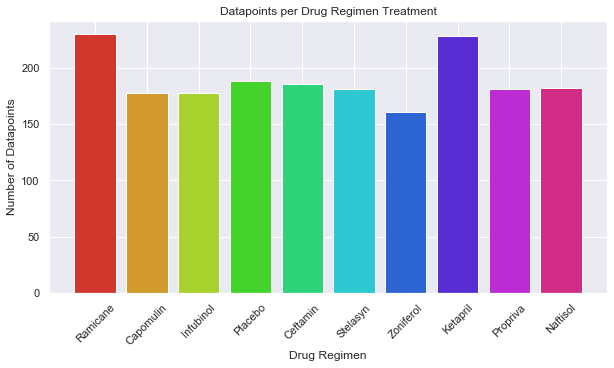

In [129]:
# PLOT BAR GRAPH..................................................................................
plt.figure(figsize=(10,5))
plt.bar(drug_regimen, datapoints, color=sb.hls_palette(10, l=.5))
plt.title("Datapoints per Drug Regimen Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Datapoints")
plt.xticks(rotation=45)
plt.show()